# Data Exploration

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

## Getting Data

In [2]:
date = datetime.datetime.strptime('2020-09-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-09-01
2020-09-02
2020-09-03
2020-09-04
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
2020-09-24
2020-09-25
2020-09-26
2020-09-27
2020-09-28
2020-09-29
2020-09-30
	does not exist jet


In [3]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [4]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-09-01T00:00:51,5.30,NaN,NaN,1.77,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-09-01T00:03:23,8.00,NaN,NaN,1.83,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-09-01T00:05:59,3.43,NaN,NaN,1.70,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-09-01T00:08:29,5.40,NaN,NaN,2.00,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-09-01T00:11:00,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
581,6842,SDS011,3460,52.028,8.916,2020-09-29T23:47:58,66.20,NaN,NaN,29.40,NaN,NaN
582,6842,SDS011,3460,52.028,8.916,2020-09-29T23:50:24,61.03,NaN,NaN,29.20,NaN,NaN
583,6842,SDS011,3460,52.028,8.916,2020-09-29T23:52:50,62.57,NaN,NaN,27.97,NaN,NaN
584,6842,SDS011,3460,52.028,8.916,2020-09-29T23:55:16,72.43,NaN,NaN,30.73,NaN,NaN


In [5]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,16244.0,16244.0,1.624400e+04,1.624400e+04,16244.000000,0.0,0.0,16244.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.136796,NaN,NaN,4.118756,NaN,NaN
std,0.0,0.0,1.421129e-14,3.552823e-15,6.929115,NaN,NaN,4.505254,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.330000,NaN,NaN,0.300000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,3.470000,NaN,NaN,1.770000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,5.870000,NaN,NaN,2.930000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,8.700000,NaN,NaN,5.100000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,351.570000,NaN,NaN,213.230000,NaN,NaN


In [6]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [7]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-01 00:00:51,6842,SDS011,3460,52.028,8.916,5.30,NaN,NaN,1.77,NaN,NaN
2020-09-01 00:03:23,6842,SDS011,3460,52.028,8.916,8.00,NaN,NaN,1.83,NaN,NaN
2020-09-01 00:05:59,6842,SDS011,3460,52.028,8.916,3.43,NaN,NaN,1.70,NaN,NaN
2020-09-01 00:08:29,6842,SDS011,3460,52.028,8.916,5.40,NaN,NaN,2.00,NaN,NaN
2020-09-01 00:11:00,6842,SDS011,3460,52.028,8.916,9.23,NaN,NaN,2.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29 23:47:58,6842,SDS011,3460,52.028,8.916,66.20,NaN,NaN,29.40,NaN,NaN
2020-09-29 23:50:24,6842,SDS011,3460,52.028,8.916,61.03,NaN,NaN,29.20,NaN,NaN
2020-09-29 23:52:50,6842,SDS011,3460,52.028,8.916,62.57,NaN,NaN,27.97,NaN,NaN


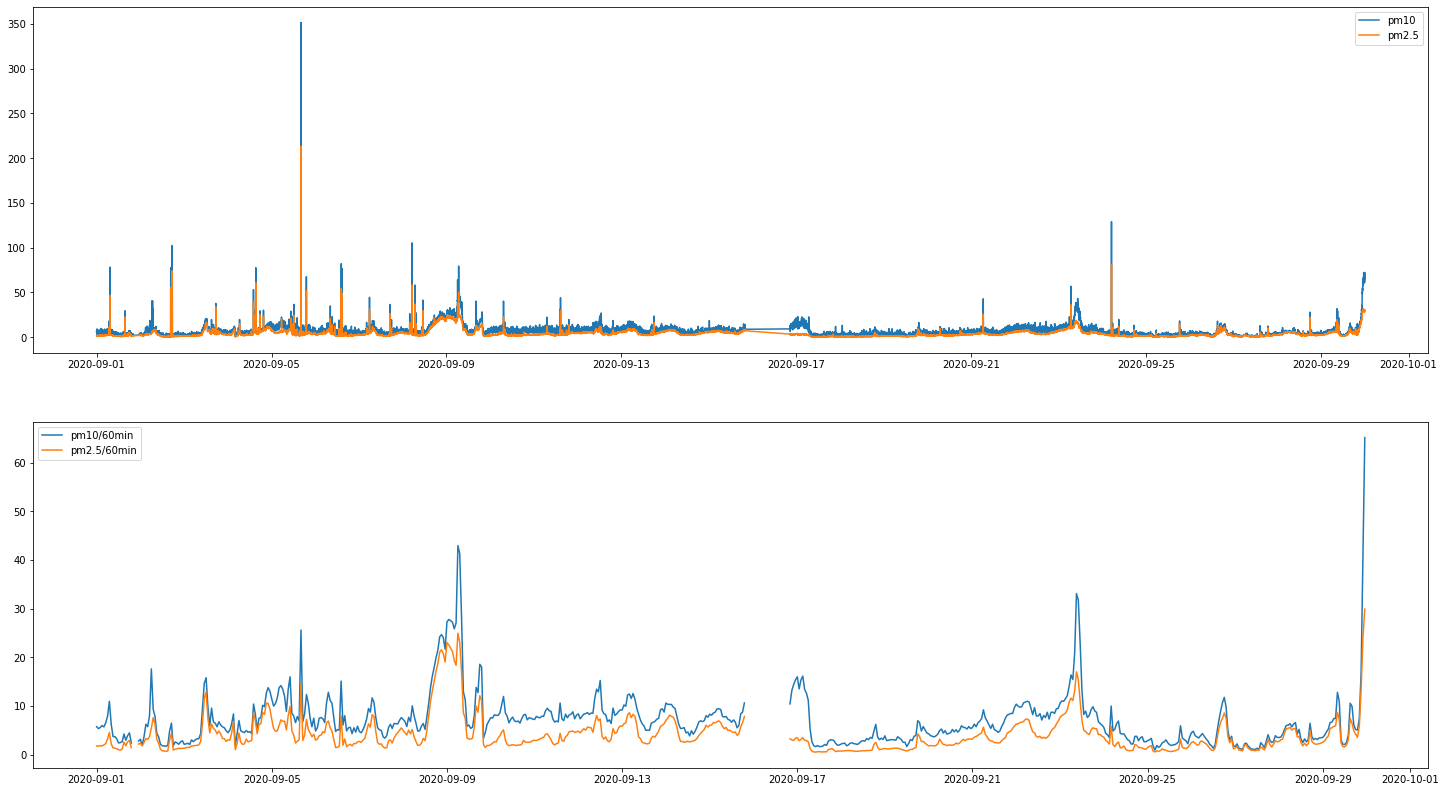

In [8]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

## Multiple Sensors

In [11]:
def get_sensor_data(SensorList):  
    SensorData = {}
    for sensor in SensorList:
        print(sensor)
        date = datetime.datetime.strptime('2020-09-05', '%Y-%m-%d').date()
        test = []
        comp = []
        while date < datetime.datetime.now().date():
            d = date.strftime('%Y-%m-%d')
            print(d)
            try:
                test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
            except:
                print("\tdoes not exist jet")
                break
            date += datetime.timedelta(days = 1)
        try:
            comp = test[0]
            for i in range(1, len(test)):
                comp = pd.concat([comp, test[i]], axis = 0)
            
        except:
            print("\tno data")
        comp['timestamp'] = pd.to_datetime(comp['timestamp'])
        comp = comp.set_index('timestamp')
        SensorData[sensor] = comp
    return SensorData

In [12]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]
SensorData = get_sensor_data(SensorList[-5:])

20466
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
2020-09-24
2020-09-25
2020-09-26
2020-09-27
2020-09-28
2020-09-29
2020-09-30
	does not exist jet
24567
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
2020-09-24
2020-09-25
2020-09-26
2020-09-27
2020-09-28
2020-09-29
2020-09-30
	does not exist jet
33786
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020-09-10
2020-09-11
2020-09-12
2020-09-13
2020-09-14
2020-09-15
2020-09-16
2020-09-17
2020-09-18
2020-09-19
2020-09-20
2020-09-21
2020-09-22
2020-09-23
2020-09-24
2020-09-25
2020-09-26
2020-09-27
2020-09-28
2020-09-29
2020-09-30
	does not exist jet
3068
2020-09-05
2020-09-06
2020-09-07
2020-09-08
2020-09-09
2020

In [14]:
SensorData['21503']

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-09-05 00:04:45,21503,SDS011,10913,51.992,9.228,9.35,NaN,NaN,7.32,NaN,NaN
2020-09-05 00:07:34,21503,SDS011,10913,51.992,9.228,8.82,NaN,NaN,6.28,NaN,NaN
2020-09-05 00:10:15,21503,SDS011,10913,51.992,9.228,7.95,NaN,NaN,6.78,NaN,NaN
2020-09-05 00:12:57,21503,SDS011,10913,51.992,9.228,8.65,NaN,NaN,6.50,NaN,NaN
2020-09-05 00:18:22,21503,SDS011,10913,51.992,9.228,9.20,NaN,NaN,6.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-29 23:48:29,21503,SDS011,10913,51.992,9.228,8.02,NaN,NaN,6.80,NaN,NaN
2020-09-29 23:50:57,21503,SDS011,10913,51.992,9.228,8.85,NaN,NaN,7.95,NaN,NaN
2020-09-29 23:53:24,21503,SDS011,10913,51.992,9.228,9.48,NaN,NaN,8.48,NaN,NaN


## Getting a list of all sensors located in OWL

In [ ]:
url = 'http://api.luftdaten.info/static/v1/data.json'
r = requests.get(url)
rdata = r.json()
sensor_df = pd.DataFrame(rdata)

In [ ]:
df = sensor_df.copy()

In [ ]:
# longitudes
longitude_min = 8.3255 #north
longitude_max = 9.5537

# latitudes
latitude_max = 52.2396 #west
latitude_min = 51.4762

In [ ]:
df = df[df['location'].map(lambda x: 'DE' in x.values())]

In [ ]:
df = df[df['sensor'].map(lambda x: 'SDS011' in x['sensor_type'].values())]

In [ ]:
df.shape

In [ ]:
longitude = df['location'].apply(lambda x: x.get('longitude'))
latitude = df['location'].apply(lambda x: x.get('latitude'))

In [ ]:
df = df.assign(longitude = longitude.values)
df = df.assign(latitude = latitude.values)

In [ ]:
df

In [ ]:
df.drop(['location', 'sampling_rate', 'id'], axis = 1, inplace = True)
df

In [ ]:
df['longitude'] = pd.to_numeric(df.longitude)
df['latitude'] = pd.to_numeric(df.latitude)
df = df[df.longitude <= longitude_max]
df = df[df.longitude >= longitude_min]
df = df[df.latitude <= latitude_max]
df = df[df.latitude >= latitude_min]

In [ ]:
df.reset_index(inplace = True, drop = True)

In [ ]:
df['SensorID'] = df['sensor'].apply(lambda x: x.get('id'))
df

### Plotting Sensor Locations on a map of OWL

In [ ]:
boundingBox = (longitude_min, longitude_max, latitude_min, latitude_max)
boundingBox

In [ ]:
owl_map = plt.imread('map.png')

In [ ]:
fig, ax = plt.subplots(figsize = (22, 40))

ax.scatter(df.longitude, df.latitude, zorder = 1, alpha = 0.9, c = 'b', s = 30)

ax.set_title('Plotting the location of the sensors in OWL')
ax.set_xlim(boundingBox[0], boundingBox[1])
ax.set_ylim(boundingBox[2], boundingBox[3])

ax.imshow(owl_map, zorder = 0, extent = boundingBox)

In [ ]:
sensorList = set(df['SensorID'])
len(sensorList)

In [ ]:
df['sensordatavalues'][0]

In [ ]:
df.sensordatavalues[0][0]

In [ ]:
p1 = df['sensordatavalues'].apply(lambda x: x[0]).apply(lambda x: x.get('value'))
p2 = df['sensordatavalues'].apply(lambda x: x[1]).apply(lambda x: x.get('value'))

In [ ]:
p1[0]

In [ ]:
p2[0]

In [ ]:
df['P1'] = p1
df['P2'] = p2

In [ ]:
df.drop(['sensor', 'sensordatavalues'], axis = 1, inplace = True)

In [ ]:
df

In [ ]:
df[['P1', 'timestamp', 'P2']]